# CC2 : TP Calcul Scientifique évalué

## 1. Problème aux limites 1D 

### 1.1. Solution exacte

In [9]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
import matplotlib.pylab as plt
import sympy as sy
import numpy as np

Autosaving every 300 seconds


Pour c = 0 :


'f='

pi**2*sin(pi*x)

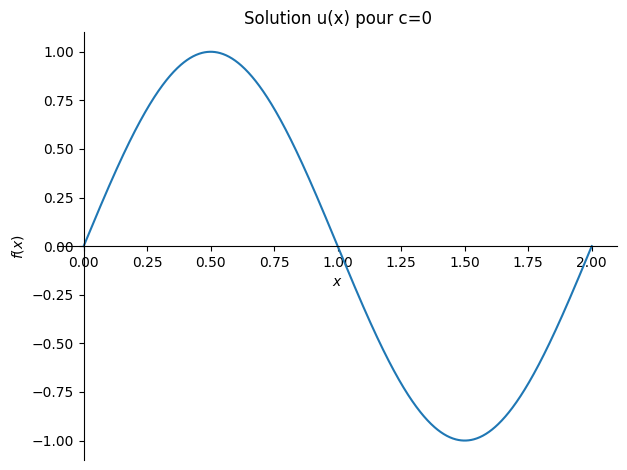

Pour c = 3 :


'f='

pi*(pi*sin(pi*x) - 3*cos(pi*x))

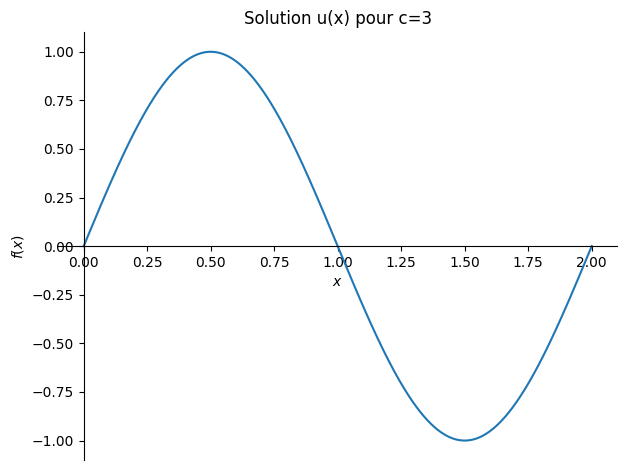

In [10]:
x, c = sy.symbols('x c', real=True)
u = sy.sin(sy.pi * x)

ff = -sy.diff(u, x, 2) - c * sy.diff(u, x, 1)
ff = ff.simplify()

print("Pour c = 0 :")
f_c0 = ff.subs(c, 0)
display("f=", f_c0)
sy.plot(u, (x, 0, 2), title="Solution u(x) pour c=0")

print("Pour c = 3 :")
f_c3 = ff.subs(c, 3)
display("f=", f_c3)
sy.plot(u, (x, 0, 2), title="Solution u(x) pour c=3")

f = sy.lambdify((x, c), ff, 'numpy')
uexact = sy.lambdify(x, u, 'numpy')

## 1.2. Approximation différence finie

c = 0 :

#### 1.2.1. N points de discrétisation et différences finies centrées en u'' 

$$-u''(x) = \frac{-u(x-h) + 2u(x) - u(x+h)}{h^2} + O(h^2)$$

In [11]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags

N = 1000
L = 2
h = L / (N + 1)
c = 0

x = np.linspace(h, L - h, N)
u_exact = lambda x: np.sin(np.pi * x)
ff = lambda x: (np.pi**2) * np.sin(np.pi * x)
F = ff(x)


#### 1.2.2. Systeme linéaire

In [12]:
DM = (2.0 / h**2) * np.ones(N)
DG = (-1.0 / h**2) * np.ones(N)
DD = (-1.0 / h**2) * np.ones(N)

A = spdiags([DG, DM, DD], [-1, 0, 1], N, N, format='csr')

print(A.toarray())


[[ 501000.5  -250500.25       0.   ...       0.         0.         0.  ]
 [-250500.25  501000.5  -250500.25 ...       0.         0.         0.  ]
 [      0.   -250500.25  501000.5  ...       0.         0.         0.  ]
 ...
 [      0.         0.         0.   ...  501000.5  -250500.25       0.  ]
 [      0.         0.         0.   ... -250500.25  501000.5  -250500.25]
 [      0.         0.         0.   ...       0.   -250500.25  501000.5 ]]


#### 1.2.3. Résolution 

In [13]:
U = spsolve(A, F)

x_full = np.concatenate(([0.0], x, [L]))
U_full = np.concatenate(([0.0], U, [0.0]))
U_exact_full = u_exact(x_full)


#### 1.2.4. Affichage

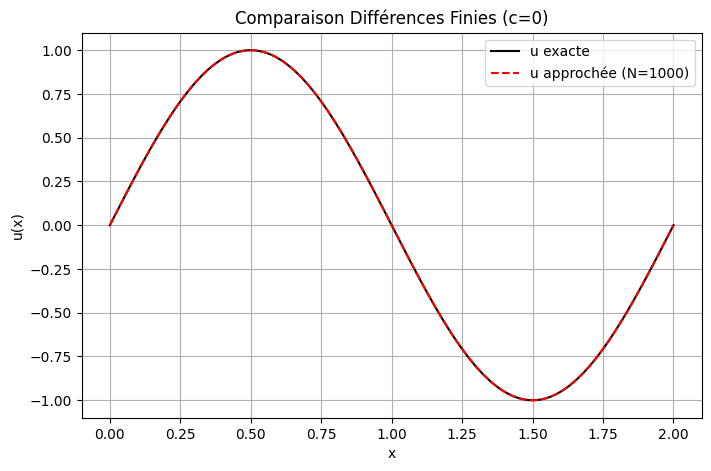

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(x_full, U_exact_full, 'k-', label='u exacte')
plt.plot(x_full, U_full, 'r--', label=f'u approchée (N={N})')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Comparaison Différences Finies (c={c})')
plt.grid(True)
plt.show()

In [15]:
Ns = [10, 50, 100, 500, 1000, 10000]
erreurs = []

for N in Ns:
    L = 2
    h = L / (N + 1)
    x = np.linspace(h, L - h, N)
    
    u_exact = lambda x: np.sin(np.pi * x)
    u_exact = np.sin(np.pi * x)
    F = (np.pi**2) * np.sin(np.pi * x)
    
    DM = (2.0 / h**2) * np.ones(N)
    DG = (-1.0 / h**2) * np.ones(N)
    DD = (-1.0 / h**2) * np.ones(N)
    
    A = spdiags([DG, DM, DD], [-1, 0, 1], N, N, format='csr')
    U = spsolve(A, F)  
    
    erreurs.append(np.max(np.abs(U - u_exact)))

print(f"Ordre de convergence : {np.log(erreurs[-2]/erreurs[-1]) / np.log(Ns[-1]/Ns[-2]):.4f}")


Ordre de convergence : 1.9992


Oui cela est cohérent car dans la formule d'approximation pour la différence finie centrée en u", on un terme O(h²) qui est présent.   
Ce terme tend vers 0 quand h est petit, donc il tend vers 0 quand N est grand.   
Donc c'est normal que notre ordre de convergence soit proche de 2.
De plus on sait que u(x) est compris entre $$\left[ 0, \frac{||F||_\infty}{8} \right]$$

c = 3 :

#### 1.2.5. Différence finie centrée en u' 

$$u'(x) = \frac{u(x+h) - u(x-h)}{2h} + O(h^2)$$


Donc le système devient : 
$$-\left( \frac{u_{i-1} - 2u_i + u_{i+1}}{h^2} \right) - 3 \left( \frac{u_{i+1} - u_{i-1}}{2h} \right) = f_i$$

### 1.2.6 + 1.2.7


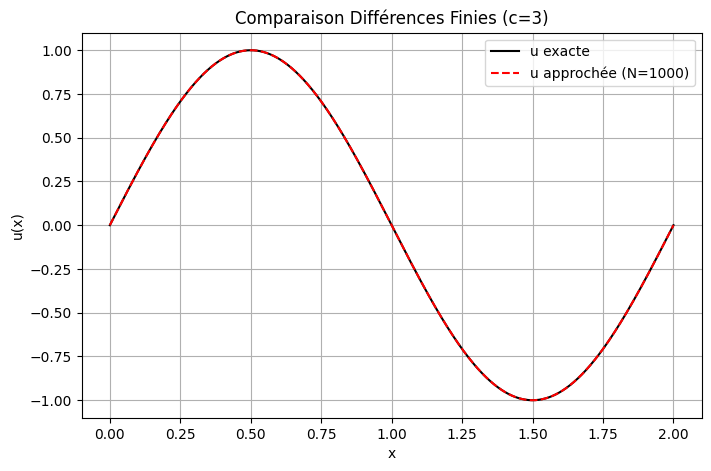

In [16]:
N = 1000
L = 2.0
h = L / (N + 1)
c = 3

x = np.linspace(h, L - h, N)

u_exact = lambda x: np.sin(np.pi * x)
ff = lambda x: (np.pi**2) * np.sin(np.pi * x) - c * np.pi * np.cos(np.pi * x)

F = ff(x)

DM = (2.0 / h**2) * np.ones(N)
DG = (-1.0 / h**2 + c / (2 * h)) * np.ones(N)
DD = (-1.0 / h**2 - c / (2 * h)) * np.ones(N)

A = spdiags([DG, DM, DD], [-1, 0, 1], N, N, format='csr')

U = spsolve(A, F)

x_full = np.concatenate(([0.0], x, [L]))
U_full = np.concatenate(([0.0], U, [0.0]))
U_exact_full = u_exact(x_full)

plt.figure(figsize=(8, 5))
plt.plot(x_full, U_exact_full, 'k-', label='u exacte')
plt.plot(x_full, U_full, 'r--', label=f'u approchée (N={N})')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Comparaison Différences Finies (c={c})')
plt.grid(True)
plt.show()

In [17]:
Ns = [10, 50, 100, 500, 1000, 10000]
erreurs = []

for N in Ns:
    L = 2
    h = L / (N + 1)
    x = np.linspace(h, L - h, N)
    
    u_exact = lambda x: np.sin(np.pi * x)
    u_exact = np.sin(np.pi * x)
    F = (np.pi**2) * np.sin(np.pi * x) - c * np.pi * np.cos(np.pi * x)
    
    DM = (2.0 / h**2) * np.ones(N)
    DG = (-1.0 / h**2 + c / (2 * h)) * np.ones(N)
    DD = (-1.0 / h**2 - c / (2 * h)) * np.ones(N)
    
    A = spdiags([DG, DM, DD], [-1, 0, 1], N, N, format='csr')
    U = spsolve(A, F)  
    
    erreurs.append(np.max(np.abs(U - u_exact)))

print(f"Ordre de convergence : {np.log(erreurs[-2]/erreurs[-1]) / np.log(Ns[-1]/Ns[-2]):.4f}")


Ordre de convergence : 1.9992


Oui, cela reste cohérent car la différence finie centrée en u' est aussi en O(h²).
Donc notre convergence est toujours proche de 2.

### 1.3. Méthode spectrale 

c = 0

#### 1.3.1. Méthode de Galerkine de type spectrale

Pour choisir une base de fonction réelle satisfaisant une condition de Dirichlet homogène aux extrémités, une base en sinus est adaptée.

La base est constituée des fonctions sinus :
$$\phi_k(x) = \sin\left(\frac{k \pi x}{2}\right), \quad 1 \le k \le N$$

$\phi_k(0) = \phi_k(2) = 0$.   
$-\phi_k''(x) = \lambda_k \phi_k(x)$ avec les valeurs propres $\lambda_k = \left(\frac{k \pi}{2}\right)^2$.

On remarque que la grille de pas $dx$ est placée au milieu des $N$ segments de longueur $dx$ qui couvrent l'intervalle $[0,L]$ ou L=2. Ainsi on évalue la fonction en $\frac {dx} 2$ puis par pas de $dx$  avant d'en calculer la transformée de Fourier "dst".

La base d'approximation $V_N$ de dimension $N$ est engendrée par les fonctions $\{\phi_k\}_{k=0}^{N-1}$ définies par :

$$
\begin{align*}
\phi_0(x) &= \frac{1}{N} \sin\left(\pi\frac{x}{L}\right) \\
\phi_1(x) &= \frac{1}{N} \sin\left(2\pi\frac{x}{L}\right) \\
&\vdots \\
\phi_k(x) &= \frac{1}{N} \sin\left((k+1)\pi\frac{x}{L}\right) \\
&\vdots \\
\phi_{N-1}(x) &= \frac{1}{2N} \sin\left(N\pi\frac{x}{L}\right)
\end{align*}
$$


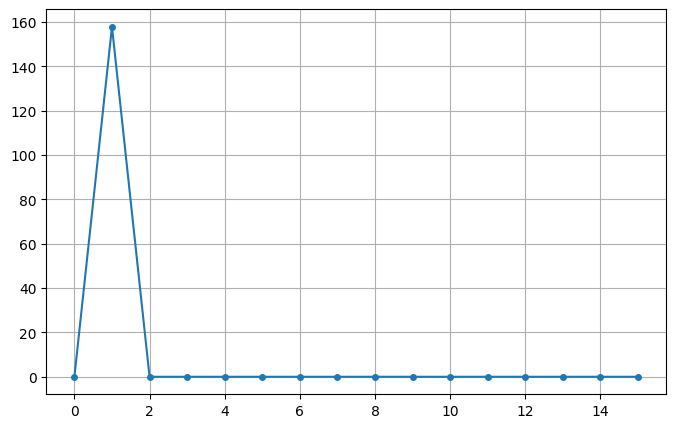

In [24]:
from scipy.fftpack import dst

N = 2**4
L = 2.0
dx = L / N

x = np.linspace(dx/2, L - dx/2, N)

F = (np.pi**2) * np.sin(np.pi * x)

dst_f = dst(F)

plt.figure(figsize=(8, 5))
plt.plot(dst_f, 'o-', markersize=4)
plt.grid(True)
plt.show()

#### 1.3.3. Problème approché dans l'espace d'approximation

On cherche $u_N(x) = \sum_{k=1}^N \hat{u}_k \phi_k(x)$ solution de l'équation.  
On a alors : 

$$\lambda_k \hat{u}_k = \hat{f}_k, \quad \forall k=1, \dots, N$$

Avec les valeurs propres $\lambda_k = \left(\frac{k \pi}{2}\right)^2$.
Les coefficients sont :

$$\hat{u}_k = \frac{\hat{f}_k}{\lambda_k}$$

La solution dans l'espace physique est obtenue par transformée inverse :
$$u_N(x) = \sum_{k=0}^{N-1} \frac{\hat{f}_k}{\lambda_k} \phi_k(x)$$

#### 1.3.4. Graphe de la solution + 1.3.5. Comparaison solution approchée et exacte 

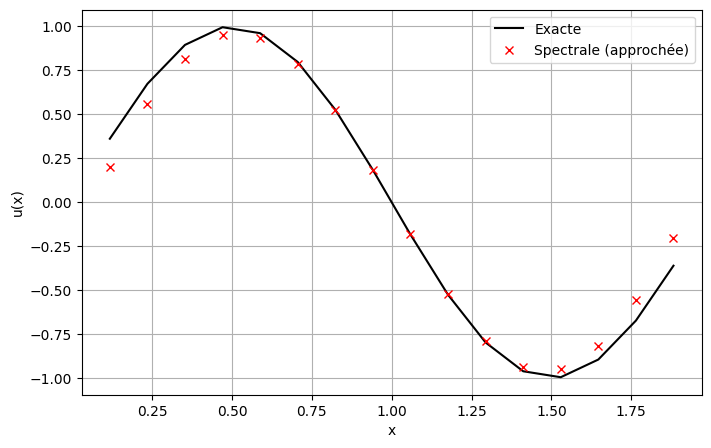

In [ ]:
from scipy.fftpack import dst, idst

N = 2**4
L = 2.0

x = np.linspace(L/(N+1), L - L/(N+1), N)

u_exact = np.sin(np.pi * x)
F = (np.pi**2) * np.sin(np.pi * x)

dst_f = dst(F)

k = np.arange(1, N + 1)
lambda_k = (k * np.pi / L)**2

dst_u = dst_f / lambda_k

u_approx = idst(dst_u) / (2 * (N + 1))

plt.figure(figsize=(8, 5))
plt.plot(x, u_exact, 'k-', label='Exacte')
plt.plot(x, u_approx, 'rx', label='Spectrale (approchée)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

#### 1.3.6. Ordre de conveergence numérique

In [20]:
Ns = [10, 50, 100, 500, 1000, 10000]
erreurs = []
L = 2.0

for N in Ns:
    x = np.linspace(L/(N+1), L - L/(N+1), N)
    
    u_exact = np.sin(np.pi * x)
    F = (np.pi**2) * np.sin(np.pi * x)
    dst_f = dst(F, type=1)
    k = np.arange(1, N + 1)
    lambda_k = (k * np.pi / L)**2
    dst_u = dst_f / lambda_k
    u_approx = idst(dst_u, type=1) / (2 * (N + 1))
    
    erreurs.append(np.max(np.abs(u_approx - u_exact)))


ordre = np.log(erreurs[-2]/erreurs[-1]) / np.log(Ns[-1]/Ns[-2])
print(f"Ordre de convergence : {ordre:.4f}")

Ordre de convergence : -0.1341


## 2. Problèmes au limites 2D

### 2.1. Solution exacte 

On choisit $$u(x, y) = \sin(\pi x) \sin(\pi y)$$

On a bien $u(0, y) = u(2, y) = 0$ et $u(x, 0) = u(x, 2) = 0$ (car $\sin(0)=0$ et $\sin(2\pi)=0$).



f(x, y) =
   2                  
2⋅π ⋅sin(π⋅x)⋅sin(π⋅y)


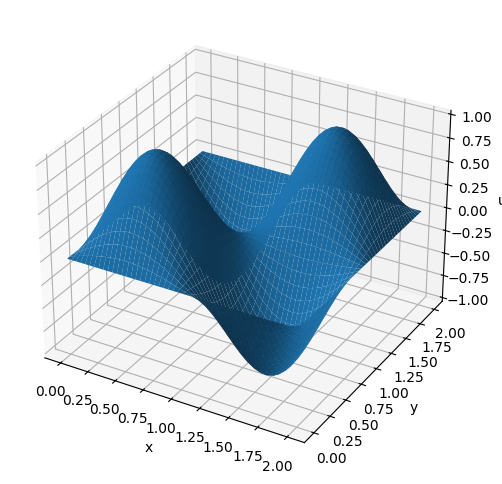

In [21]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

x, y = sy.symbols('x y', real=True)
u_sym = sy.sin(sy.pi * x) * sy.sin(sy.pi * y)

diff_xx = sy.diff(u_sym, x, 2)
diff_yy = sy.diff(u_sym, y, 2)
f_sym = -(diff_xx + diff_yy)
f_sym = f_sym.simplify()

print("f(x, y) =")
sy.pprint(f_sym) # $$f(x, y) = 2\pi^2 \sin(\pi x) \sin(\pi y)$$

u_exact_func = sy.lambdify((x, y), u_sym, 'numpy')
f_func = sy.lambdify((x, y), f_sym, 'numpy')

L = 2.0
N_plot = 50
x_val = np.linspace(0, L, N_plot)
y_val = np.linspace(0, L, N_plot)
X, Y = np.meshgrid(x_val, y_val)
Z = u_exact_func(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

#### 2.2.1 Base d'approximation (Dimension $N_x \times N_y$)

C'est un problème de Dirichlet homogène sur le carré $\Omega = ]0,2[ \times ]0,2[$, on utilise une méthode de Galerkine spectrale.

On considère l'espace d'approximation $V_N$ engendré par la base $\{\phi_{k,l}\}$ :

$$
\phi_{k,l}(x,y) = \sin\left(\frac{k \pi x}{2}\right) \sin\left(\frac{l \pi y}{2}\right)
$$

pour $1 \le k \le N_x$ et $1 \le l \le N_y$.

Ces fonctions vérifient les conditions aux limites ($u=0$ sur les bords) :
$$-\Delta \phi_{k,l} = \lambda_{k,l} \phi_{k,l} \quad \text{avec} \quad \lambda_{k,l} = \left(\frac{k\pi}{2}\right)^2 + \left(\frac{l\pi}{2}\right)^2$$

#### 2.2.2. Décompostion de f

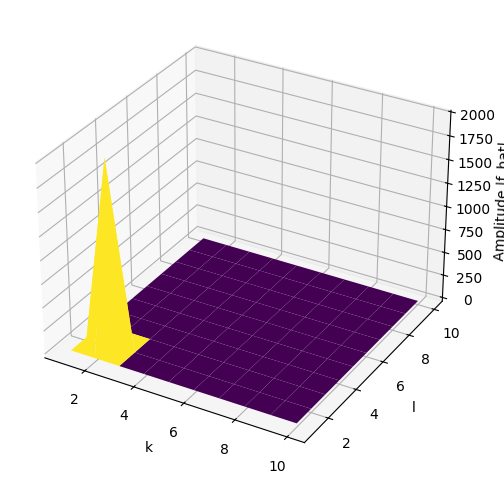

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dst
from mpl_toolkits.mplot3d import Axes3D

N = 10
L = 2.0
dx = L / N

x = np.linspace(dx/2, L - dx/2, N)
y = np.linspace(dx/2, L - dx/2, N)
X, Y = np.meshgrid(x, y)

F = 2 * np.pi**2 * np.sin(np.pi * X) * np.sin(np.pi * Y)

f_hat = dst(dst(F, axis=1, type=2), axis=0, type=2)

k = np.arange(1, N + 1)
l = np.arange(1, N + 1)
K, L_grid = np.meshgrid(k, l)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(K, L_grid, np.abs(f_hat), cmap='viridis', edgecolor='none')

ax.set_xlabel('k')
ax.set_ylabel('l')
ax.set_zlabel('Amplitude |f_hat|')

plt.show()

#### 2.2.3. Problème approché

On cherche $u_N \in V_N$ solution de l'équation.
Grâce à la base de sinus qui diagonalise le Laplacien (conditions de Dirichlet homogènes), l'équation :
$$-\Delta u_N = P_N f$$
devient :
$$\lambda_{k,l} \hat{u}_{k,l} = \hat{f}_{k,l} \quad \text{pour } 1 \le k,l \le N$$

avec les valeurs $\lambda_{k,l} = \left(\frac{k\pi}{2}\right)^2 + \left(\frac{l\pi}{2}\right)^2$.

Les coefficients de la solution approchée sont donc simplement :
$$\hat{u}_{k,l} = \frac{\hat{f}_{k,l}}{\lambda_{k,l}}$$

#### 2.2.4. Résolution du probleme approché et graphe de la solution

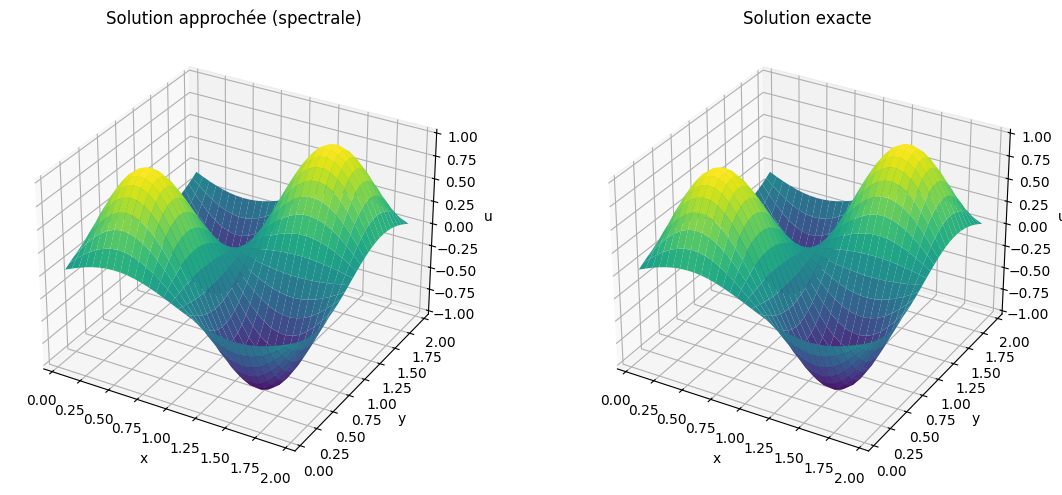

In [27]:
from scipy.fftpack import dst, idst
from mpl_toolkits.mplot3d import Axes3D

N = 32
L = 2.0
h = L / (N + 1)

x = np.linspace(h, L - h, N)
y = np.linspace(h, L - h, N)
X, Y = np.meshgrid(x, y)

F = 2 * np.pi**2 * np.sin(np.pi * X) * np.sin(np.pi * Y)

f_hat = dst(dst(F, axis=0, type=1), axis=1, type=1)

k = np.arange(1, N + 1)
l = np.arange(1, N + 1)
K, L_grid = np.meshgrid(k, l)
lambda_kl = (np.pi * K / L)**2 + (np.pi * L_grid / L)**2

u_hat = f_hat / lambda_kl
u_approx = idst(idst(u_hat, axis=0, type=1), axis=1, type=1) / (2 * (N + 1))**2

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, u_approx, cmap='viridis', edgecolor='none')
ax1.set_title('Solution approchée (spectrale)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u')
u_exact = np.sin(np.pi * X) * np.sin(np.pi * Y)
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='none')
ax2.set_title('Solution exacte')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u')

plt.tight_layout()
plt.show()

#### 2.2.5. Comparaison solution exacte et approchée

#### 2.2.6. Ordre de grandeur numérique

### 3. Problème d'évolution 1D

#### 3.1. Solution exacte 

On peut choisir $$u(x,t) = e^{-t} \sin(\pi x)$$
car : $$u(2,t) = e^{-t} \sin(2\pi) = e^{-t} \times 0 = 0$$
et : $$u(0,t) = e^{-t} \sin(0) = e^{-t} \times 0 = 0$$



Calcul de f avec sympy : 

In [23]:
x, t = sy.symbols('x t', real=True)
u = sy.exp(-t) * sy.sin(sy.pi * x)

f_sym = sy.diff(u, t, 1) - sy.diff(u, x, 2)
f_sym = f_sym.simplify()

print("f(x, t) =")
display(f_sym)

f_func = sy.lambdify((x, t), f_sym, 'numpy')
u_exact_func = sy.lambdify((x, t), u, 'numpy')

f(x, t) =


(-1 + pi**2)*exp(-t)*sin(pi*x)

### 3.2. Méthode spectrale

#### 3.2.1. Approximation du probleme par méthode spectrale : Formule de Duhamel

On cherche la solution approchée $u_N(x,t)$ dans l'espace engendré par la base de sinus adaptée aux conditions de Dirichlet homogènes sur $]0, 2[$ :
$$u_N(x,t) = \sum_{k=1}^N \hat{u}_k(t) \sin\left(\frac{k \pi x}{2}\right)$$

En projetant l'équation $\partial_t u - \partial_{xx} u = f$ sur cette base, on obtient :

$$
\frac{d}{dt}\hat{u}_k(t) + \lambda_k \hat{u}_k(t) = \hat{f}_k(t)
$$

$\lambda_k = \left(\frac{k\pi}{2}\right)^2$.

Formule de Duhamel : 

$$
\hat{u}_k(t+\delta t) = e^{-\lambda_k \delta t} \hat{u}_k(t) + \int_t^{t+\delta t} e^{-\lambda_k (t+\delta t - s)} \hat{f}_k(s) \, ds
$$

#### 3.2.2. Formule de quadrature du trapèze

#### 3.2.3. Graphe de la solution de la fonction de x, à t différents